# importing necessary library

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
loca='haker earth amazone hiring'

In [5]:
train=pd.read_csv(loca+'/train.csv')
test=pd.read_csv(loca+'/test.csv')

In [6]:
train.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


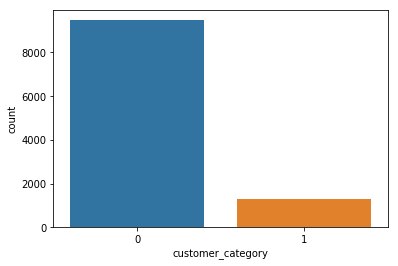

In [8]:
sns.countplot(train['customer_category'])

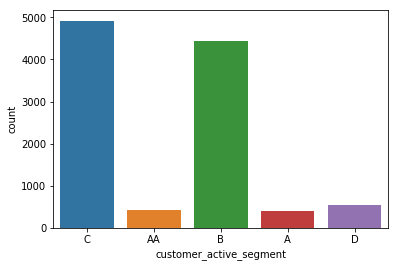

In [9]:
sns.countplot(train['customer_active_segment'])

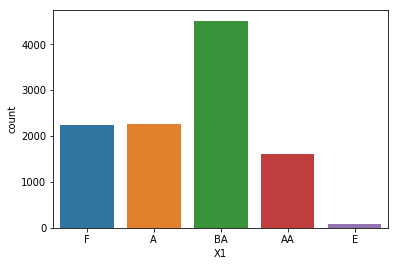

In [10]:
sns.countplot(train['X1'])

# preprocessing of data

In [11]:
train.isnull().any()

customer_id                         False
customer_visit_score                False
customer_product_search_score        True
customer_ctr_score                  False
customer_stay_score                  True
customer_frequency_score            False
customer_product_variation_score     True
customer_order_score                 True
customer_affinity_score             False
customer_active_segment              True
X1                                   True
customer_category                   False
dtype: bool

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
train.dtypes

customer_id                          object
customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
customer_category                     int64
dtype: object

In [14]:
imp_con=SimpleImputer(strategy='mean')
imp_obj=SimpleImputer(strategy='most_frequent')

In [15]:
train1=train.copy()

In [16]:
train1.shape

(10738, 12)

In [17]:
train1.drop(['customer_id','customer_category'],axis=1,inplace=True)

In [18]:
train1.shape

(10738, 10)

# DEALING WITH NULL VALUES

In [19]:
features_with_na=[feature for feature in train1.columns if train1[feature].isnull().sum()>0]
features_with_na

['customer_product_search_score',
 'customer_stay_score',
 'customer_product_variation_score',
 'customer_order_score',
 'customer_active_segment',
 'X1']

In [20]:
obj=[]
for i in features_with_na:
    if train1[i].dtype=='O':
        obj.append(i)
con=[]
for i in features_with_na:
    if train1[i].dtype=='float64':
        con.append(i)

In [21]:
con

['customer_product_search_score',
 'customer_stay_score',
 'customer_product_variation_score',
 'customer_order_score']

In [22]:
train1[obj]=imp_obj.fit_transform(train[obj])
train1[con]=imp_con.fit_transform(train[con])

In [23]:
train1.shape

(10738, 10)

In [24]:
train1.isnull().any()

customer_visit_score                False
customer_product_search_score       False
customer_ctr_score                  False
customer_stay_score                 False
customer_frequency_score            False
customer_product_variation_score    False
customer_order_score                False
customer_affinity_score             False
customer_active_segment             False
X1                                  False
dtype: bool

In [25]:
X=pd.get_dummies(train1)
y=train['customer_category']

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler().fit(X)

C:\Users\ajay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [76]:
X=scaler.transform(X)

# importing sklearn libraries for model training 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [29]:
gd=GridSearchCV(RandomForestClassifier(),{'n_estimators':[50,100,150],'max_depth':[12,15,20,22]},cv=5).fit(X,y)

In [31]:
gd.best_params_

{'max_depth': 20, 'n_estimators': 50}

In [32]:
gd.best_score_

0.9755075433041535

In [33]:
from sklearn.metrics import precision_score

In [34]:
score=precision_score(train['customer_category'],gd.best_estimator_.predict(X),average='macro')

In [35]:
score

0.9996825060853001

In [36]:
test1=test.copy()

In [37]:
test1.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [38]:
test1.drop(['customer_id'],axis=1,inplace=True)

In [39]:
test1.isnull().any()

customer_visit_score                False
customer_product_search_score        True
customer_ctr_score                  False
customer_stay_score                  True
customer_frequency_score            False
customer_product_variation_score     True
customer_order_score                 True
customer_affinity_score             False
customer_active_segment              True
X1                                   True
dtype: bool

In [40]:
features_with_na_test=[feature for feature in test1.columns if test1[feature].isnull().sum()>0]
features_with_na_test

['customer_product_search_score',
 'customer_stay_score',
 'customer_product_variation_score',
 'customer_order_score',
 'customer_active_segment',
 'X1']

In [41]:
obj=[]
for i in features_with_na_test:
    if test1[i].dtype=='O':
        obj.append(i)
con=[]
for i in features_with_na_test:
    if test1[i].dtype=='float64':
        con.append(i)

In [42]:
test1[obj]=imp_obj.transform(test[obj])
test1[con]=imp_con.transform(test[con])

In [43]:
Xt=pd.get_dummies(test1)


In [68]:
Xt=scaler.transform(Xt)

In [44]:
submission=pd.DataFrame([])

In [45]:
submission['customer_id']=test['customer_id']
submission['customer_category']=gd.best_estimator_.predict(Xt)

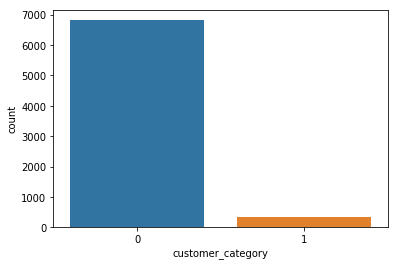

In [46]:
sns.countplot(submission['customer_category'])

In [47]:
submission.to_csv('amazone_hir1.csv',index=None)

In [48]:
submission

,customer_id,customer_category
0,csid_10739,0
1,csid_10740,0
2,csid_10741,0
3,csid_10742,0
4,csid_10743,0
5,csid_10744,0
6,csid_10745,0
7,csid_10746,0
8,csid_10747,0
9,csid_10748,0
